# Invoice NER with FT [LayoutLMv3](https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-invoice)

In [1]:
from transformers import LayoutLMv3ForTokenClassification, AutoProcessor
from datasets import load_from_disk

import lovely_tensors as lt

from src.config import init_config
from src.invoice import process_invoice

## Config and settings

In [2]:
lt.monkey_patch()

In [3]:
config = init_config()

In [4]:
print(config)

data:
  fatura: mathieu1256/FATURA2-invoices
  rvl_cdip_subset: jinhybr/rvl_cdip_400_train_val_test
  invoiceXpert:
    hf_path: wiF0n/InvoiceXpert
    local_path: data/invoiceXpert
    num_labels: 2
    label_col: label
    image_col: image
    label_names:
    - invoice
    - not-invoice
models:
  classification:
    oob:
      pt: microsoft/dit-base
      ft: microsoft/dit-base-finetuned-rvlcdip
  retrieval:
    layoutlmv3: microsoft/layoutlmv3-base
    layoutlmv3_invoice_ft: Theivaprakasham/layoutlmv3-finetuned-invoice
mlflow:
  experiments:
    classification: invoice-classification
utils:
  seed: 420
  run_date: 2024-22-02/26/24



## Load the data

In [5]:
invoice_df = load_from_disk(config.data.invoiceXpert.local_path)

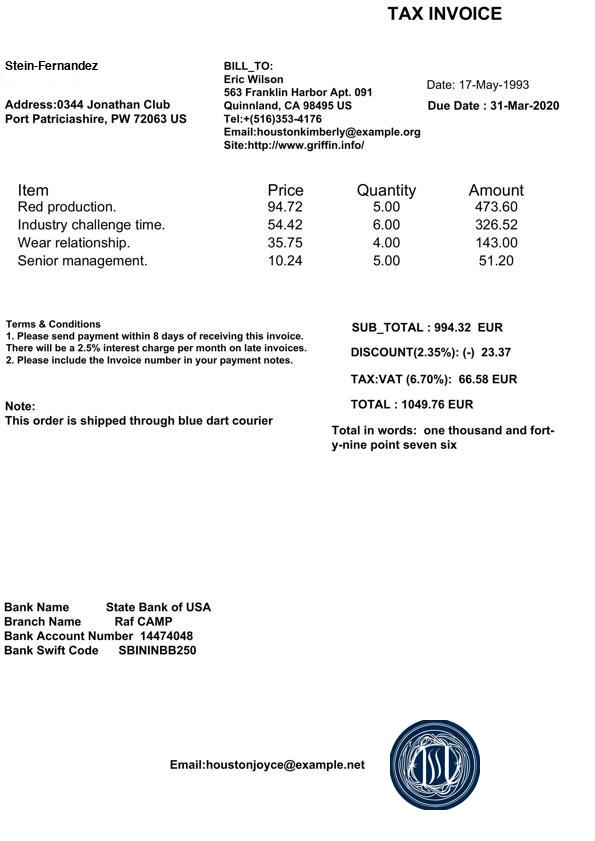

In [6]:
test_image = invoice_df["test"][1250]["image"]
test_image

## Load model

In [7]:
processor = AutoProcessor.from_pretrained(config.models.retrieval.layoutlmv3, apply_ocr=True)

In [8]:
model = LayoutLMv3ForTokenClassification.from_pretrained(config.models.retrieval.layoutlmv3_invoice_ft)

## Scoring

In [12]:
image, final_predicion = process_invoice(invoice_df["test"][1251]["image"], processor, model)

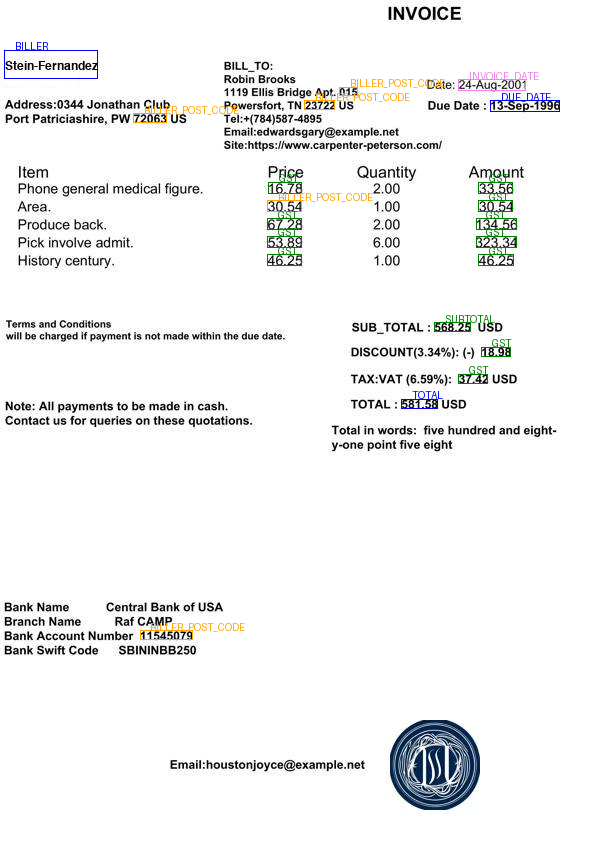

In [13]:
image

In [11]:
final_predicion

[{'word': ' Fernandez',
  'label': 'BILLER',
  'box': [40.46, 49.619, 97.58, 79.895]},
 {'word': ' 31-Mar-2020',
  'label': 'DUE_DATE',
  'box': [490.875, 100.92, 558.7049999999999, 109.33]},
 {'word': ' 72063',
  'label': 'BILLER_POST_CODE',
  'box': [133.875,
   113.53500000000001,
   166.60000000000002,
   122.78599999999999]},
 {'word': ' 94.72',
  'label': 'BILLER_POST_CODE',
  'box': [267.75, 200.999, 301.665, 211.932]},
 {'word': ' 473.60',
  'label': 'SUBTOTAL',
  'box': [474.81, 200.999, 516.46, 211.932]},
 {'word': ' 54.42',
  'label': 'GST',
  'box': [267.75, 218.66, 301.665, 229.59300000000002]},
 {'word': ' 326.52',
  'label': 'GST',
  'box': [476.0, 218.66, 516.46, 229.59300000000002]},
 {'word': ' 35.75',
  'label': 'GST',
  'box': [267.75, 236.32100000000003, 301.665, 247.254]},
 {'word': ' 143.00',
  'label': 'GST',
  'box': [476.595, 236.32100000000003, 516.46, 247.254]},
 {'word': ' 51.20',
  'label': 'GST',
  'box': [478.975, 254.82299999999998, 512.89, 265.75600000